Assume that we have this relationship:
$$ln(y) = 2*x + \epsilon$$

Normally, a model is used to estimate the value of the coefficient 2 given the observed values of Y and X. We can then use this estimated value to predict Y given X. I want to investigate whether we should use
- $\hat{y} = exp(2*x)$
- or applying some kind of correction, which is the case in Black Scholes model of stock prices:
$$lnS = rt + \sigma W$$
$$E[lnS] = rt$$
but
$$E[S] = exp(rt) - 0.5\sigma^2t$$
because of the exponential function, we need to apply the correction

<AxesSubplot:>

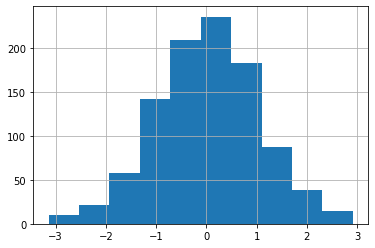

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

N = 1000
sigma = 0.5
sigma_noise = 0.05
def get_ln_y(sigma=sigma, sigma_noise=sigma_noise):
    x = np.random.normal(size=N, scale=sigma)
    noise = np.random.normal(size=N, scale = sigma_noise)

    ln_y = x*2 + noise
    return pd.Series(ln_y)

get_ln_y().hist()

# Distribution of Mean of Exponential vs Exponential of the mean
Exponential of the mean(red) <b>under-predicts</b> the real value:

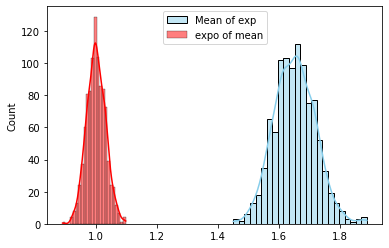

In [32]:
y1, y2 = [], []
for i in range(1000):
    this_y = get_ln_y()
    y1.append(np.mean(np.exp(this_y)))
    y2.append(np.exp(np.mean(this_y)))

sns.histplot(data=y1, color="skyblue", label="Mean of exp", kde=True)
sns.histplot(data=y2, color="red", label="expo of mean", kde=True)
plt.legend()

In [24]:
def get_mean(sigma, sigma_noise):
    res = []
    for i in range(1000):
        this_y = get_ln_y(sigma, sigma_noise)
        res.append(np.exp(np.mean(this_y)) - np.mean(np.exp(this_y)))
    return np.mean(res)

get_mean(0.5, 0.05)

-0.6479739295324117

# See whether the uncertainty impacts this error
the large the uncertainty, the more negative the correction is

# small Noise compared to distribution of X

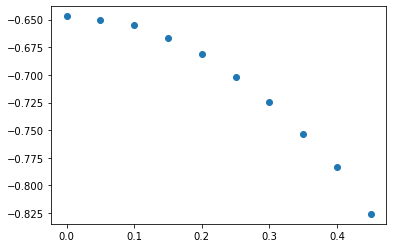

In [36]:
x_range = np.arange(0, 0.50, 0.05)
res = []
for x in x_range:
    res.append(get_mean(sigma, x))

plt.scatter(x= x_range, y= res)

# X's uncertainty is very large

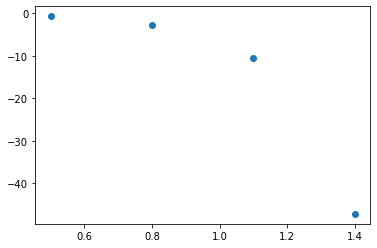

In [30]:
x_range = np.arange(0.5, 1.5, 0.3)
res = []
for x in x_range:
    res.append(get_mean(x, 0.05))
plt.scatter(x= x_range, y= res)

# Large noise, small X

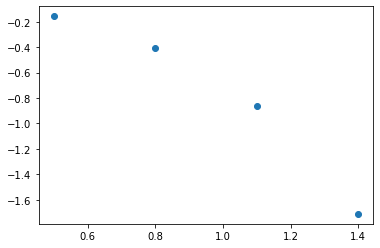

In [38]:
x_range = np.arange(0.5, 1.5, 0.3)
res = []
for x in x_range:
    res.append(get_mean(0.1, x))
plt.scatter(x= x_range, y= res)

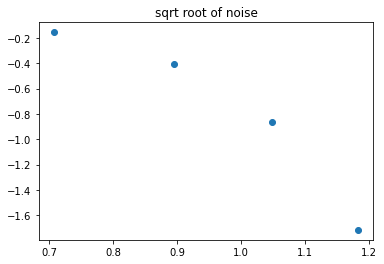

In [86]:
x_range = np.arange(0.5, 1.5, 0.3)
res = []
for x in x_range:
    res.append(get_mean(0.1, x))
plt.scatter(x= np.sqrt(x_range), y= res)
_ = plt.title("sqrt root of noise")

## The more the uncertainty, the more the under-estimation is

# In the context of <font color='blue'>linear regression</font>, will there still be an issue???

In [39]:
import statsmodels.api as sm

<AxesSubplot:ylabel='Count'>

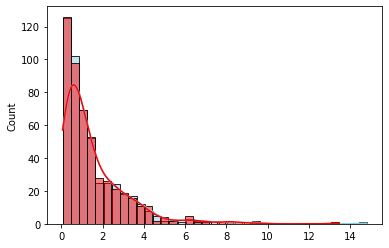

In [82]:
sigma = 0.5
sigma_noise = 0.05
N = 1000
# Generate data
x = np.random.normal(size=N, scale=sigma)
noise = np.random.normal(size=N, scale = sigma_noise)
ln_y = x*2 + noise
y = np.exp(ln_y)

# train
train_index = int(N/2)
model = sm.OLS(ln_y[:train_index],x[:train_index]).fit()
y_predict = np.exp(model.predict(x[train_index:]))

sns.histplot(data=y_predict, color="skyblue", label="Predict", kde=True)
sns.histplot(data=y[train_index:], color="red", label="Actual", kde=True)

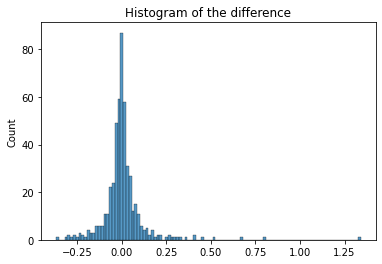

In [83]:
sns.histplot(data=y_predict - y[train_index:])
_ = plt.title("Histogram of the difference")

## Reducing the noise does not change the accuracy by much

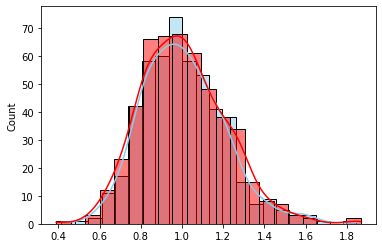

<AxesSubplot:ylabel='Count'>

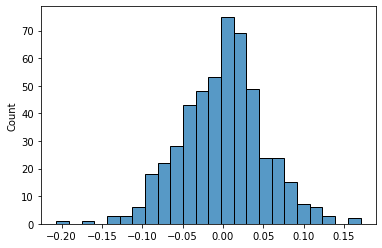

In [84]:
sigma = 0.1
sigma_noise = 0.05
N = 1000
# Generate data
x = np.random.normal(size=N, scale=sigma)
noise = np.random.normal(size=N, scale = sigma_noise)
ln_y = x*2 + noise
y = np.exp(ln_y)

# train
train_index = int(N/2)
model = sm.OLS(ln_y[:train_index],x[:train_index]).fit()
y_predict = np.exp(model.predict(x[train_index:]))

sns.histplot(data=y_predict, color="skyblue", label="Predict", kde=True)
sns.histplot(data=y[train_index:], color="red", label="Actual", kde=True)
plt.show()
sns.histplot(data=y_predict - y[train_index:])

## Somehow, the uncertainty of the coefficients has canceled out the correction of the predicted value